In [64]:
import numpy as np
import pandas as pd
df = pd.read_csv('train_data.csv')

In [65]:
x = df.drop(['PrecipitationSumInches', 'hrs'], axis = 1)
x.to_csv('train_final.csv', index = False)

In [66]:
y = df['PrecipitationSumInches']

In [67]:
print(x.shape)

(335, 18)


In [68]:
print(x.values[0][0])

74.0


In [69]:
#x = np.array(x)
#y = np.multiply(y,25.4)

In [70]:
#x = x[:,:,None]

In [71]:
x.shape

(335, 18)

In [72]:
y.shape

(335,)

In [73]:
x = np.array(x, dtype=float)
y = np.array(y, dtype=float)
#y = y[:,None]

In [74]:
y.shape

(335,)

In [88]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)# Calculate the absolute errors
print(predictions)
errors = abs(predictions - y_test)# Print out the mean absolute error (mae)
print(errors)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

[9.00000e-05 0.00000e+00 7.35000e-03 1.88000e-03 1.13100e-02 5.00000e-05
 1.45630e-01 7.00000e-04 3.70000e-03 6.00000e-05 1.21000e-03 0.00000e+00
 7.00000e-05 2.86800e-02 0.00000e+00 3.66000e-03 8.13100e-02 6.25500e-02
 0.00000e+00 2.15740e-01 0.00000e+00 0.00000e+00 1.39100e-02 1.31390e-01
 1.40000e-03 7.00000e-05 2.76310e-01 0.00000e+00 1.52000e-03 1.88500e-02
 2.34000e-03 9.19720e-01 1.06000e-02 3.13900e-02 1.13701e+00 0.00000e+00
 1.49820e-01 2.80000e-04 7.52000e-03 2.06360e-01 1.29840e-01 6.20000e-04
 9.43200e-02 4.98000e-03 9.51700e-02 1.37732e+00 2.40000e-04 6.10000e-04
 2.16000e-03 1.16780e-01 8.68050e-01 0.00000e+00 1.50000e-04 9.04000e-03
 5.13000e-03 0.00000e+00 2.49650e-01 0.00000e+00 6.32900e-02 0.00000e+00
 2.04400e-01 2.13800e-01 4.78400e-02 0.00000e+00 1.16000e-03 8.34800e-02
 2.40000e-04]
[9.00000e-05 0.00000e+00 7.35000e-03 1.88000e-03 1.13100e-02 5.00000e-05
 4.56300e-02 7.00000e-04 3.70000e-03 6.00000e-05 1.21000e-03 0.00000e+00
 7.00000e-05 2.86800e-02 0.00000e+00 

In [86]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df

,Actual,Predicted
0,0.00,0.00001
1,0.56,0.94601
2,0.00,0.00000
3,0.00,0.46146
4,0.00,0.25457
...,...,...
62,0.00,0.00457
63,0.00,0.00000
64,0.00,0.00001
65,0.00,0.00071


In [87]:
mape = 100 * (errors / y_test)# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: nan %.


<ipython-input-87-b37ced1946fb>:1: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * (errors / y_test)# Calculate and display accuracy
<ipython-input-87-b37ced1946fb>:1: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * (errors / y_test)# Calculate and display accuracy


In [12]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(range(0,2))

In [13]:
x = min_max_scaler.fit_transform(x)
x

array([[0.58333333, 0.49206349, 0.39655172, ..., 0.61904762, 0.3       ,
        0.45833333],
       [0.33333333, 0.3015873 , 0.29310345, ..., 0.42857143, 0.5       ,
        0.33333333],
       [0.36111111, 0.25396825, 0.17241379, ..., 0.04761905, 0.2       ,
        0.0625    ],
       ...,
       [0.33333333, 0.22222222, 0.13793103, ..., 0.14285714, 0.1       ,
        0.125     ],
       [0.51388889, 0.34920635, 0.18965517, ..., 0.28571429, 0.2       ,
        0.27083333],
       [0.52777778, 0.44444444, 0.37931034, ..., 0.23809524, 0.2       ,
        0.14583333]])

In [14]:
y = min_max_scaler.fit_transform(y)
y

array([[0.12568306],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.04371585],
       [0.        ],
       [0.0273224 ],
       [0.        ],
       [0.00273224],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01639344],
       [0.0136612 ],
       [0.        ],
       [0.        ],
       [0.00546448],
       [0.0136612 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00546448],
       [0.        ],
       [0.04098361],
       [0.        ],
       [0.   

In [15]:
x = x = x[:,:,None]
x.shape

(335, 18, 1)

In [16]:
y.shape

(335, 1)

In [17]:
x

array([[[0.58333333],
        [0.49206349],
        [0.39655172],
        ...,
        [0.61904762],
        [0.3       ],
        [0.45833333]],

       [[0.33333333],
        [0.3015873 ],
        [0.29310345],
        ...,
        [0.42857143],
        [0.5       ],
        [0.33333333]],

       [[0.36111111],
        [0.25396825],
        [0.17241379],
        ...,
        [0.04761905],
        [0.2       ],
        [0.0625    ]],

       ...,

       [[0.33333333],
        [0.22222222],
        [0.13793103],
        ...,
        [0.14285714],
        [0.1       ],
        [0.125     ]],

       [[0.51388889],
        [0.34920635],
        [0.18965517],
        ...,
        [0.28571429],
        [0.2       ],
        [0.27083333]],

       [[0.52777778],
        [0.44444444],
        [0.37931034],
        ...,
        [0.23809524],
        [0.2       ],
        [0.14583333]]])

In [18]:
y

array([[0.12568306],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.04371585],
       [0.        ],
       [0.0273224 ],
       [0.        ],
       [0.00273224],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01639344],
       [0.0136612 ],
       [0.        ],
       [0.        ],
       [0.00546448],
       [0.0136612 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00546448],
       [0.        ],
       [0.04098361],
       [0.        ],
       [0.   

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout
import matplotlib.pyplot as plt

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [22]:
x_train.shape

(268, 18, 1)

In [53]:
model = Sequential()

In [54]:
model.add(Dense(20, activation='sigmoid', input_shape=(None, 1)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))
model.add(LSTM((1),return_sequences = False))

In [55]:
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mse'])

In [56]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, None, 20)          40        
_________________________________________________________________
dense_16 (Dense)             (None, None, 10)          210       
_________________________________________________________________
dense_17 (Dense)             (None, None, 1)           11        
_________________________________________________________________
lstm (LSTM)                  (None, 1)                 12        
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [57]:
hist = model.fit(x_train, y_train, epochs = 250, validation_data = (x_test, y_test))

Epoch 1/250
9/9 [==============================] - 1s 135ms/step - loss: 0.2788 - mse: 0.0866 - val_loss: 0.2585 - val_mse: 0.0878
Epoch 2/250
9/9 [==============================] - 0s 23ms/step - loss: 0.2409 - mse: 0.0669 - val_loss: 0.2214 - val_mse: 0.0700
Epoch 3/250
9/9 [==============================] - 0s 29ms/step - loss: 0.2044 - mse: 0.0508 - val_loss: 0.1859 - val_mse: 0.0555
Epoch 4/250
9/9 [==============================] - 0s 19ms/step - loss: 0.1696 - mse: 0.0376 - val_loss: 0.1521 - val_mse: 0.0441
Epoch 5/250
9/9 [==============================] - 0s 18ms/step - loss: 0.1364 - mse: 0.0272 - val_loss: 0.1198 - val_mse: 0.0353
Epoch 6/250
9/9 [==============================] - 0s 18ms/step - loss: 0.1046 - mse: 0.0198 - val_loss: 0.0885 - val_mse: 0.0288
Epoch 7/250
9/9 [==============================] - 0s 19ms/step - loss: 0.0735 - mse: 0.0142 - val_loss: 0.0575 - val_mse: 0.0243
Epoch 8/250
9/9 [==============================] - 0s 16ms/step - loss: 0.0423 - mse: 0.0

In [61]:
res = model.predict(x_test)
res_s = res[:]
print(len(res))

67


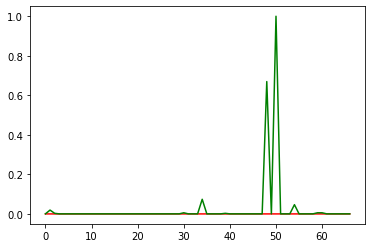

In [62]:
plt.plot(range(67), res_s, c = 'r')
plt.plot(range(67), y_test, c = 'g')
plt.show()

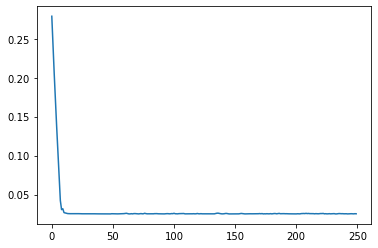

In [63]:
plt.plot(hist.history['loss'])
plt.show()